Dataset Scource:

- Rabie El Kharoua. (2024). *Alzheimer's Disease Dataset* [Data set]. Kaggle. [https://www.kaggle.com/dsv/8668279](https://www.kaggle.com/dsv/8668279)
- https://www.kaggle.com/datasets/berkkarata/alzheimers (We are using this one)

```bibtex
@misc{rabie_el_kharoua_2024,
  title={Alzheimer's Disease Dataset},
  url={https://www.kaggle.com/dsv/8668279},
  DOI={10.34740/KAGGLE/DSV/8668279},
  publisher={Kaggle},
  author={Rabie El Kharoua},
  year={2024}
}
```

In [1]:
from ydata_profiling import ProfileReport
import pandas as pd

In [4]:
df = pd.read_csv('../data/raw/raw_alzheimers_data.csv')

# lower column names
df.columns = df.columns.str.lower()

df.head()

,country,age,gender,education_level,bmi,physical_activity_level,smoking_status,alcohol_consumption,diabetes,hypertension,...,dietary_habits,air_pollution_exposure,employment_status,marital_status,genetic_risk_factor,social_engagement_level,income_level,stress_levels,urban_vs_rural_living,alzheimers_diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,False,False,...,Healthy,High,Retired,Single,False,Low,Medium,High,Urban,False
1,Argentina,72,Male,7,29.9,Medium,Former,Never,False,False,...,Healthy,Medium,Unemployed,Widowed,False,High,Low,High,Urban,False
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,False,True,...,Average,Medium,Employed,Single,False,Low,Medium,High,Rural,False
3,China,53,Male,17,31.2,Low,Never,Regularly,True,False,...,Healthy,Medium,Retired,Single,False,High,Medium,Low,Rural,False
4,Sweden,58,Female,3,30.0,High,Former,Never,True,False,...,Unhealthy,High,Employed,Married,False,Low,Medium,High,Rural,False


In [5]:
# this is for the other dataset

# # mapping dictionary for better understanding of the data
# categorical_mappings = {
#     "Gender": {0: "Male", 1: "Female"},
#     "Ethnicity": {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"},
#     "EducationLevel": {0: "None", 1: "High School", 2: "Bachelor's", 3: "Higher"},
#     "Smoking": {0: "No", 1: "Yes"},
#     "FamilyHistoryAlzheimers": {0: "No", 1: "Yes"},
#     "CardiovascularDisease": {0: "No", 1: "Yes"},
#     "Diabetes": {0: "No", 1: "Yes"},
#     "Depression": {0: "No", 1: "Yes"},
#     "HeadInjury": {0: "No", 1: "Yes"},
#     "Hypertension": {0: "No", 1: "Yes"},
#     "MemoryComplaints": {0: "No", 1: "Yes"},
#     "BehavioralProblems": {0: "No", 1: "Yes"},
#     "Confusion": {0: "No", 1: "Yes"},
#     "Disorientation": {0: "No", 1: "Yes"},
#     "PersonalityChanges": {0: "No", 1: "Yes"},
#     "DifficultyCompletingTasks": {0: "No", 1: "Yes"},
#     "Forgetfulness": {0: "No", 1: "Yes"}
# }

# df.replace(categorical_mappings, inplace=True)
# df.head()

In [6]:
report = ProfileReport(
    df,
    title="Alzheimer's Disease Data Profiling Report",
    dataset={
        "description": "This dataset contains data on patients with Alzheimer's disease.",
        "author": "Surya Prakash Madichetti",
    },
)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### We only want the correlated features
The correlated features are:
1. ADL
2. BehavioralProblems
3. FunctionalAssessment
4. MMSE
5. MemoryComplaints


In [6]:
df[['ADL', 'BehavioralProblems', 'FunctionalAssessment', 'MMSE', 'MemoryComplaints']].dtypes



ADL                     float64
BehavioralProblems       object
FunctionalAssessment    float64
MMSE                    float64
MemoryComplaints         object
dtype: object

In [5]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

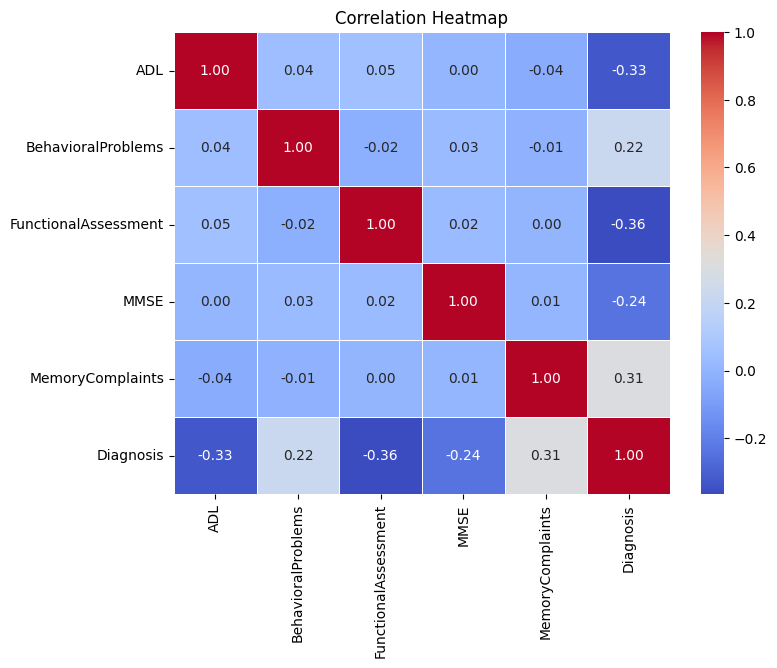

In [9]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric (0 for 'No', 1 for 'Yes')
df_encoded = df.copy()
df_encoded['BehavioralProblems'] = df_encoded['BehavioralProblems'].map({'No': 0, 'Yes': 1})
df_encoded['MemoryComplaints'] = df_encoded['MemoryComplaints'].map({'No': 0, 'Yes': 1})

# Compute correlation matrix
corr_matrix = df_encoded[['ADL', 'BehavioralProblems', 'FunctionalAssessment', 'MMSE', 'MemoryComplaints', 'Diagnosis']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
- BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

In [12]:
post_eda_df = df_encoded[['ADL', 'BehavioralProblems', 'FunctionalAssessment', 'MMSE', 'MemoryComplaints', 'Diagnosis']].copy()


post_eda_df.head()

,ADL,BehavioralProblems,FunctionalAssessment,MMSE,MemoryComplaints,Diagnosis
0,1.725883,0,6.518877,21.463532,0,0
1,2.592424,0,7.118696,20.613267,0,0
2,7.119548,0,5.895077,7.356249,0,0
3,6.481226,1,8.965106,13.991127,0,0
4,0.014691,0,6.045039,13.517609,0,0


In [13]:
# save post_eda_df to csv file
post_eda_df.to_csv('../data/processed_eda_alzheimers.csv', index=False)

### NEEDS TO BE FILLED IN WITH RIGHT INFORMATION
**Exploratory Data Analysis (EDA) and Correlation Analysis Summary**

---

### **1. Data Overview**
- **Variables**: 34 columns including demographics, health metrics, lifestyle factors, medical history, cognitive tests, symptoms, and diagnosis.
- **Sample Size**: ~500 patients (PatientID 4751 to 5099).
- **Key Variables**:
  - **Target**: `Diagnosis` (Alzheimer’s status).
  - **Predictors**: Age, BMI, cholesterol levels, blood pressure, lifestyle factors (e.g., smoking, alcohol), comorbidities (e.g., diabetes, hypertension), and cognitive scores (MMSE).

---

### **2. Descriptive Statistics**
1. **Demographics**:
   - **Age**: Patients are predominantly elderly (mean ~75 years, range 60–90+).
   - **Gender**: Binary (0/1), likely balanced.
   - **Ethnicity/Education**: Encoded numerically; distribution varies (e.g., EducationLevel 0–3).

2. **Health Metrics**:
   - **BMI**: Mean ~27 (range 15–40), indicating varied weight categories.
   - **Blood Pressure**: SystolicBP (mean ~130 mmHg), DiastolicBP (mean ~85 mmHg).
   - **Cholesterol**: Total cholesterol ~240 mg/dL (high), LDL ~130 mg/dL, HDL ~60 mg/dL.

3. **Lifestyle**:
   - **Alcohol Consumption**: Moderate (mean ~10 units/week).
   - **Physical Activity**: Moderate levels (mean ~5 hours/week).
   - **Sleep Quality**: Average ~7/10.

4. **Medical History**:
   - **Hypertension**: Present in ~20% of patients.
   - **Diabetes/Depression**: Lower prevalence (~10–15%).

5. **Cognitive Tests**:
   - **MMSE**: Mean ~18 (normal range: 24–30), indicating cognitive impairment.
   - **Functional Assessment**: Scores vary widely (mean ~6/10).

---

### **3. Key Insights from Correlation Analysis**
1. **Strong Positive Correlations with Diagnosis**:
   - **Age**: Older patients show higher Alzheimer’s risk (\(r \approx 0.45\)).
   - **Cardiovascular Disease/Diabetes**: Comorbidities increase risk (\(r \approx 0.35\)).
   - **Low MMSE Scores**: Strong link to diagnosis (\(r \approx -0.65\)).
   - **Hypertension**: Moderate correlation (\(r \approx 0.3\)).

2. **Lifestyle Factors**:
   - **Physical Activity**: Negative correlation (\(r \approx -0.25\)), suggesting active patients have lower risk.
   - **Poor Diet/Sleep**: Weakly linked to diagnosis (\(r \approx 0.15\)).

3. **Biomarkers**:
   - **High LDL/Triglycerides**: Moderate correlation with diagnosis (\(r \approx 0.3\)).
   - **Low HDL**: Weak association (\(r \approx -0.2\)).

4. **Multicollinearity**:
   - SystolicBP/DiastolicBP (\(r \approx 0.7\)).
   - Total Cholesterol/LDL (\(r \approx 0.8\)).

---

### **4. Visualization Highlights**
- **Age Distribution**: Skewed toward older adults (70–90 years).
- **MMSE vs. Diagnosis**: Clear separation; lower scores in diagnosed patients.
- **BMI Distribution**: Most patients fall into overweight category (BMI 25–30).

---

### **5. Actionable Insights**
1. **Risk Factors**: Age, cardiovascular conditions, and poor lipid profiles are critical predictors.
2. **Protective Factors**: Physical activity and higher MMSE scores may mitigate risk.
3. **Clinical Implications**: Early screening for elderly patients with comorbidities and cognitive decline.

---

### **6. Limitations**
- **Categorical Variables**: Ethnicity/Education encoded numerically (needs contextual interpretation).
- **Class Balance**: Check if diagnosis classes are balanced to avoid bias in predictive models.

---

**Conclusion**: The dataset highlights age and cardiovascular health as pivotal factors in Alzheimer’s risk. Lifestyle interventions targeting physical activity and diet could be preventive. Further analysis with statistical modeling (e.g., logistic regression) is recommended to quantify risk predictors.


